Welcome to Salary Prediction System
Press ENTER key to proceed

0 ... attachment_Salary-Data_lyst5512 (1).csv
Select file to create ML model0
attachment_Salary-Data_lyst5512 (1).csv is selected
Reading csv file
Creating Dataset
Dataset created
Enter test data size (between 0 and 1)0.6
Model creation in progression
Model is created
Press ENTER key to predict test data in trained model

[[ 4.1]
 [10.5]
 [ 9. ]
 [ 7.9]
 [ 3.2]
 [ 8.7]
 [ 1.3]
 [ 6.8]
 [ 1.1]
 [ 4.9]
 [ 5.9]
 [ 4. ]
 [ 8.2]
 [ 3. ]
 [10.3]
 [ 5.1]
 [ 7.1]
 [ 6. ]]   ... [ 57081 121872 105582 101302  54445 109431  46205  91738  39343  67938
  81363  56957 113812  60150 122391  66029  98273  93940]   ... [ 63557.39112751 124562.41093621 110264.35941854  99779.12163892
  54978.56021692 107404.74911501  36867.69496121  89293.88385931
  34961.28809219  71183.0186036   80715.05294871  62604.187693
 102638.73194246  53072.15334789 122656.00406718  73089.42547262
  92153.49416284  81668.25638322]
[4.1] ... 57081 ... 63557.39112751

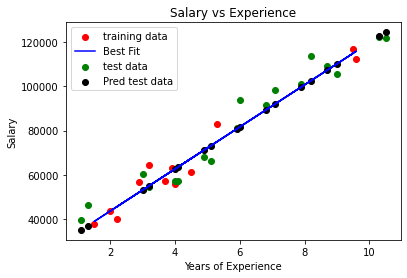

Our model is 94.81% accurate
Now you can predict salary of an employee using our model

Enter experience in years of the candidates, separated by comma
10,8,0


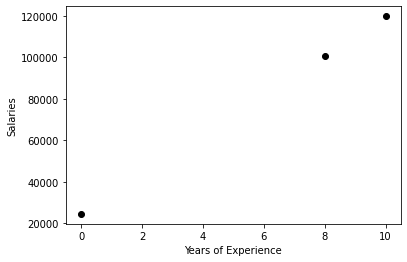

   Experience       Salaries
0        10.0  119796.393764
1         8.0  100732.325073
2         0.0   24476.050313


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
def welcome():
    print("Welcome to Salary Prediction System")
    print("Press ENTER key to proceed")
    input()
def checkcsv():
    csv_files=[]
    cur_dir=os.getcwd()
    content_list=os.listdir(cur_dir)
    for x in content_list:
        if x.split('.')[-1]=='csv':
            csv_files.append(x)
    if len(csv_files)==0:
        return 'No csv file in the directory'
    else:
        return csv_files
def display_and_select_csv(csv_files):
    i=0
    for file_name in csv_files:
        print(i,'...',file_name)
        i+=1
    return csv_files[int(input("Select file to create ML model"))]
def graph(X_train,Y_train,regressionObject,X_test,Y_test,Y_pred):
    plt.scatter(X_train,Y_train,color='red',label='training data')
    plt.plot(X_train,regressionObject.predict(X_train),color='blue',label='Best Fit')
    plt.scatter(X_test,Y_test,color='green',label='test data')
    plt.scatter(X_test,Y_pred,color='black',label='Pred test data')
    plt.title("Salary vs Experience")
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()
def main():
    welcome()
    try:
        csv_files=checkcsv()
        if csv_files=='No csv file in the directory':
            raise FileNotFoundError('No csv file in the directory')
        csv_file=display_and_select_csv(csv_files)
        print(csv_file,'is selected')
        print('Reading csv file')
        print('Creating Dataset')
        dataset=pd.read_csv(csv_file)
        print('Dataset created')
        X=dataset.iloc[:,:-1].values
        Y=dataset.iloc[:,-1].values
        s=float(input("Enter test data size (between 0 and 1)") )
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=s)
        print("Model creation in progression")
        regressionObject=LinearRegression()
        regressionObject.fit(X_train,Y_train)
        print("Model is created")
        print("Press ENTER key to predict test data in trained model")
        input()

        Y_pred=regressionObject.predict(X_test)
        i=0#
        print(X_test,'  ...',Y_test,'  ...',Y_pred)
        while i<len(X_test):#
            print(X_test[i],'...',Y_test[i],'...',Y_pred[i])
            i+=1
        print("Press ENTER key to see above result in graphical format")
        input()
        graph(X_train,Y_train, regressionObject, X_test, Y_test, Y_pred)
        r2=r2_score(Y_test,Y_pred)
        print("Our model is %2.2f%% accurate" %(r2*100))

        print("Now you can predict salary of an employee using our model")
        print("\nEnter experience in years of the candidates, separated by comma")

        exp=[float(e) for e in input().split(',')]
        ex=[]
        for x in exp:
            ex.append([x])
        experience =np.array(ex)
        salaries=regressionObject.predict(experience)

        plt.scatter(experience,salaries,color='black')
        plt.xlabel('Years of Experience')
        plt.ylabel('Salaries')
        plt.show()

        d=pd.DataFrame({'Experience':exp,'Salaries':salaries})#
        print(d) 
        
    except FileNotFoundError:
        print('No csv file in the directory')
        print("Press ENTER key to exit")
        input()
        exit()

if __name__=="__main__":
    main()
    input()
